In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\sowmy\Downloads\VehiclePerformancePrediction (1)\Vehicle Performance Prediction\Dataset\data.csv")
# print the first five rows of the data
df.head()


,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


# EDA

In [24]:
df.shape

(398, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [26]:
# print the count of missing values
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [30]:
# unique elements of horsepower to look for discrepancies
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [31]:
# Removing "?" from horoscope
df = df[df.horsepower != '?']

In [32]:
df.horsepower = df.horsepower.astype('float')

In [33]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [34]:
df.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.576531,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,0.805518,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,1.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,2.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [15]:
df.describe(include='object')

,name
count,392
unique,301
top,amc matador
freq,5


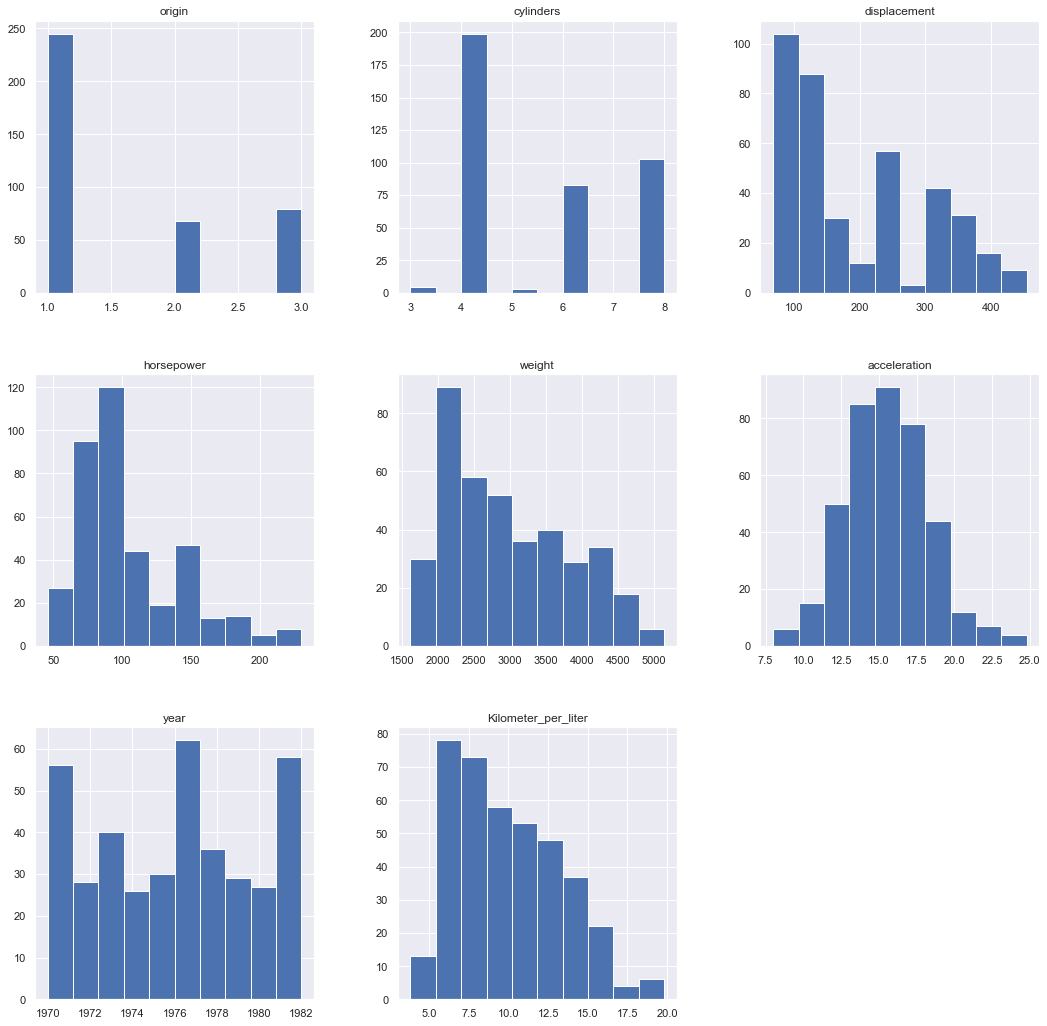

In [16]:
fig = df.hist(figsize = (18,18))


# univariate analysis

In [17]:
df.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

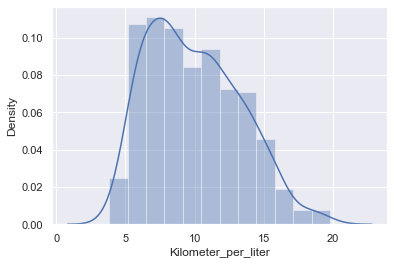

In [35]:
sns.distplot(df.Kilometer_per_liter)

In [4]:
print("Skewness: %f" % df['Kilometer_per_liter'].skew())
print("Kurtosis: %f" % df['Kilometer_per_liter'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


In [6]:
data_2 = df.copy(deep = True)

In [7]:
data_2['log_mileage'] = np.log(data_2.Kilometer_per_liter)

In [8]:
data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,log_mileage
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587,2.035044
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156,1.852722
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587,2.035044
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299,1.917261
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443,1.977885


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

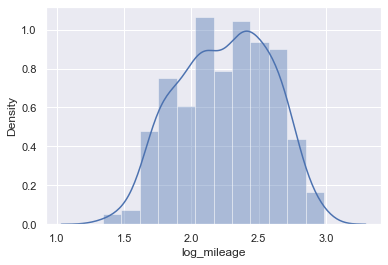

In [9]:
sns.distplot(data_2.log_mileage)

We expect that our data points will be on red line for gaussian distributin. We see dist tails


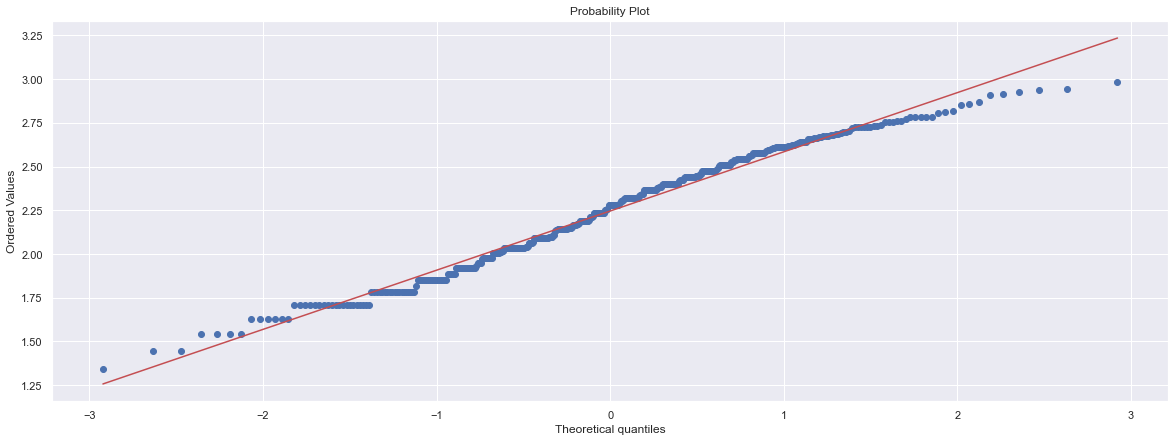

In [10]:
# qq plot:
plt.figure(figsize = (20,7))
stats.probplot(data_2.log_mileage,plot=plt)
plt.show
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")


In [11]:
data_2.displacement.describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

<AxesSubplot:xlabel='displacement', ylabel='Density'>

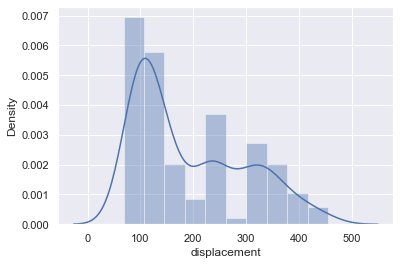

In [12]:
sns.distplot(data_2.displacement)

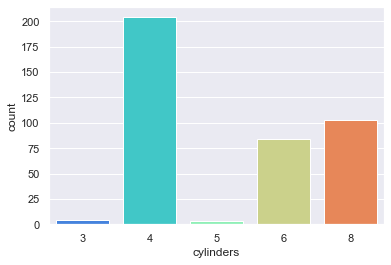

In [14]:
sns.countplot(data_2.cylinders,data=df,palette = "rainbow")
plt.show()

In [15]:
data_3 = data_2.copy(deep = True)

In [16]:
data_3.cylinders = data_3.cylinders.astype('object')

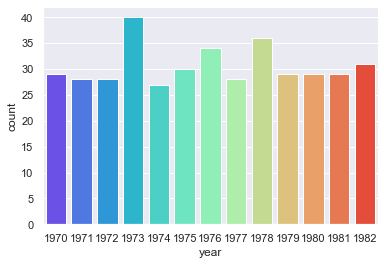

In [17]:
sns.countplot(data_3['year'],palette = "rainbow")
plt.show()

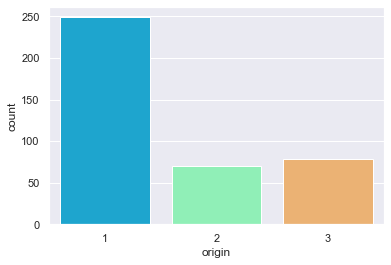

In [18]:
sns.countplot(data_3.origin,palette = "rainbow")
plt.show()

# MULTIVARIATE ANALYSIS

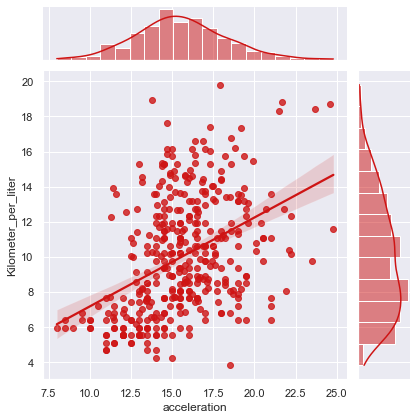

In [22]:
x = data_3[['Kilometer_per_liter','acceleration']]
sns.jointplot(x.loc[:,'acceleration'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")


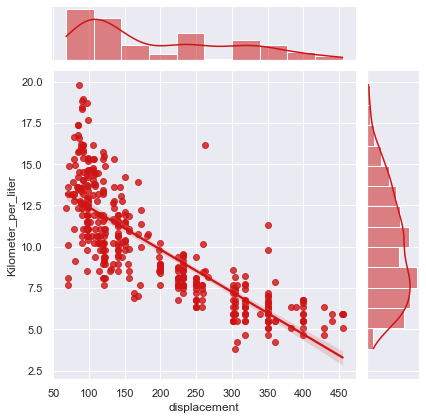

In [23]:
x = data_3[['Kilometer_per_liter','displacement']]
sns.jointplot(x.loc[:,'displacement'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")


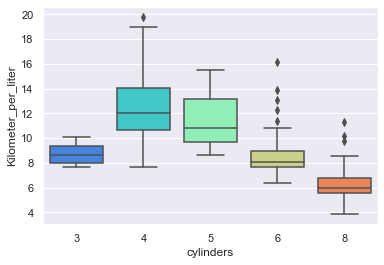

In [24]:
sns.boxplot(y='Kilometer_per_liter',x='cylinders',data=data_3,palette = "rainbow")
plt.show()

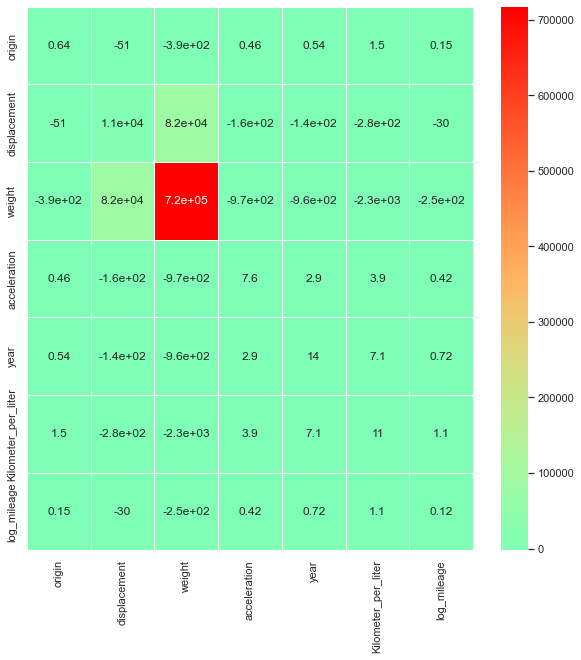

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data_3.cov(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()


In [29]:
drop_list = ['weight','displacement','name']
data_cleaned = data_3.drop(drop_list,axis = 1 )        
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130,12.0,1970,7.652587,2.035044
1,1,8,165,11.5,1970,6.377156,1.852722
2,1,8,150,11.0,1970,7.652587,2.035044
3,1,8,150,12.0,1970,6.802299,1.917261
4,1,8,140,10.5,1970,7.227443,1.977885


In [30]:
data_cleaned.columns

Index(['origin', 'cylinders', 'horsepower', 'acceleration', 'year',
       'Kilometer_per_liter', 'log_mileage'],
      dtype='object')

In [31]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies.head()

,origin,acceleration,year,Kilometer_per_liter,log_mileage,cylinders_4,cylinders_5,cylinders_6,cylinders_8,horsepower_102,...,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,1,12.0,1970,7.652587,2.035044,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,11.5,1970,6.377156,1.852722,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,11.0,1970,7.652587,2.035044,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,12.0,1970,6.802299,1.917261,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10.5,1970,7.227443,1.977885,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
x = data_with_dummies.drop(['Kilometer_per_liter','log_mileage'],axis = 1)

In [34]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [35]:
X = scaler.fit_transform(x)

In [36]:
y = data_with_dummies.log_mileage

In [37]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (318, 100)
X_test  (80, 100)
y_train  (318,)
y_test  (80,)


In [38]:
from sklearn.linear_model import LinearRegression
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, y_train)


LinearRegression()

In [39]:
# predict the values
y_pred_OLS = OLS_model.predict(X_test)

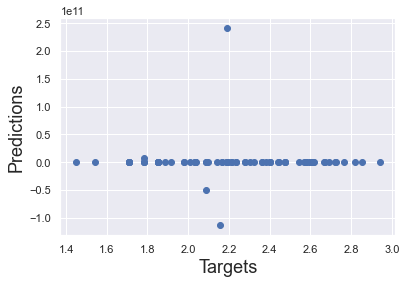

In [40]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

In [41]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test, y_pred_OLS))



In [43]:
print('R quare ',r_squared_OLS)
print('Adj R square ',Adj_r_squared_OLS)
print('RMSE ',rmse_OLS)

R quare  0.9217116038614427
Adj R square  0.919386205956337
RMSE  30404318228.9245
